# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

## Video Presentation
https://drive.google.com/file/d/1f0cGnT-cjMRF-jUtZXkegnBLwAq5r_EM/view?usp=sharing

# Overview

Dementia stands for a group of severe symptoms affecting memory, thinking and social abilities and disable the individuals from keeping the normal lifestyles. Our project aimed to figure out the relationship between biological factors and social factors and the clinical dementia ratings of individuals. We used the decision tree classifier to train 2 merged datasets from the same resources in order to predict dementia (cdr) by subject's biological factors (MMSE, etiv, and nwbv) and their social factors (age, education level, and socioeconomic status). Our hypothesis that these independent factors are correlated to dementia and they can be used to predict dementia is supported with our project.

# Names

- Ziyi Wang
- Huilin Xu
- Shucun Si
- Eva Zhuang
- Wanying Xu

<a id='research_question'></a>
# Research Question

Can dementia be predicted based on socioeconomic status, educational level, age, and brain development?

<a id='background'></a>

## Background & Prior Work

*Dementia is a term used to describe a group of symptoms affecting memory, thinking and social abilities severely enough to interfere with your daily life. It isn't a specific disease, but several diseases can cause dementia. Many factors can eventually contribute to dementia. Some factors, such as age, can't be changed. Others can be addressed to reduce your risk. Research shows that the main causes of dementia can be ages, lack of exercise, family history, excessive alcohol use, socioeconomic status,etc. Alzheimer's disease is the most common cause of a progressive dementia in older adults, but there are a number of other causes of dementia. Depending on the cause, some dementia symptoms might be reversible. Therefore, it is significant to find the possible causes of the dementia and find ways to prevent them. *

References (include links):
- 1) This reference discusses the relationship between aging and dementia. It suggests that though it is normal to forget things more easily as your age becomes older, a few habits may protect you from dementia, such as quitting smoking, being physically active, and staying engaged. Here is the link: https://www.cdc.gov/aging/publications/features/dementia-not-normal-aging.html
- 2) This reference discusses the relationship between brain volume and dementia. It compares the normalized brain volume between subjects with and without dementia, and suggests that the normalized brain volume of the mixed dementia/neuropsychiatric subjects is reduced from the normal subjects.
The link is here: https://journals.lww.com/investigativeradiology/Abstract/2001/09000/Brain_Volume,_Intracranial_Volume,_and_Dementia.6.aspx.

# Hypothesis


We believe that socioeconomic status, brain development, age, and educational level are factors of the development of dementia. 

Our background research has shown that dementia may be caused by many intertwined factors mentioned above. Thus, if we examine the relationship between those factors and the diagnosis of dementia by different analytical approaches, we should be able to establish a conclusion to our research question. Alzheimer's disease is the most common cause of a progressive dementia in older adults, but there are a number of other causes of dementia. Depending on the cause, some dementia symptoms might be reversible. Therefore, it is significant to find the possible causes of the dementia and find ways to prevent them.*

# Dataset(s)

*Fill in your dataset information here*


- Dataset Name: Cross-sectional MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults
- Link to the dataset: https://www.kaggle.com/jboysen/mri-and-alzheimers
- Number of observations: 436

This data set consists of a cross-sectional collection of 436 subjects aged 18 to 96. For each subject it records their information such as gender, age, dominant hand, Education Level, Socioeconomic Status, and some dementia and brain scan results such as Mini Mental State Examination and Normalize Whole Brain Volume.


- Dataset Name: Longitudinal MRI Data in Nondemented and Demented Older Adults
- Link to the dataset: https://www.kaggle.com/jboysen/mri-and-alzheimers
- Number of observations: 373

This data set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject it records their information such as visit order, gender, age, dominant hand, Education Level, Socioeconomic Status, and a categorical variable displaying whether the subject is identified as demented during the study.

We plan to merge these datasets using the columns that are present in both datasets. Since people are in different situations during each of their visits, it is appropriate to treat each visit as an individual observation and merge them together.

# Setup

In [1]:
pip install patsy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import sklearn.linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

long =pd.read_csv('https://raw.githubusercontent.com/KevinXu4Real/COGS108_Repo/main/oasis_longitudinal.csv')
cross=pd.read_csv('https://raw.githubusercontent.com/KevinXu4Real/COGS108_Repo/main/oasis_cross-sectional.csv')
long.head()
cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


# Data Cleaning

The raw datasets contain some missing values and inconsistent column names, and thus we conducted some data cleaning to make it more usable.

We first look into the two data sets, and then drop the rows that are all NaNs.

We checked the type of each column, and found that the columns that should be numeric are already in numeric type, which means we don't need to transform them.

We kept the columns that are most relevant to the question and drop the rest of them, and then dropped the rows with any NaNs from the new dataframes with fewer columns.

We noticed that the two datasets have some variables that are not in the same case, and we thus converted them all to lower case so that we can merge them.

We also noticed that the education variable in the two datasets are scaled differently, so we rescaled them to make them in the same scale.

We then merged the two datasets.

In [4]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
long_null_rows=long.isnull().any(axis=1).sum()
long=long.dropna(axis=0,how='all')
long.shape
cross_null_rows=cross.isnull().any(axis=1).sum()
cross=cross.dropna(axis=0,how='all')
cross.shape

(436, 12)

In [5]:
long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [7]:
cross.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

In [8]:
long.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

All the columns that we expect to have numeric elements are in numeric types, so we don't have to transfer them from string to numerics.

There are no clear evidence suggesting that gender distribution affects brain development and dementia condition, so we don't need to check the distribution of gender in our datasets.

We pick out the columns that are most relevant to our question from both tables and store them in new dataframes. The columns are age, education level, socialeconomic status, Mini Mental State Examination, Clinical Dementia Rating, Estimated Total Intracranial Volume, and Normalize Whole Brain Volume.

In [9]:
cross_sub = cross[['Age', 'Educ', 'SES','MMSE', 'CDR', 'eTIV', 'nWBV']]
cross_sub

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV
0,74,2.0,3.0,29.0,0.0,1344,0.743
1,55,4.0,1.0,29.0,0.0,1147,0.810
2,73,4.0,3.0,27.0,0.5,1454,0.708
3,28,NaN,NaN,NaN,NaN,1588,0.803
4,18,NaN,NaN,NaN,NaN,1737,0.848
...,...,...,...,...,...,...,...
431,20,NaN,NaN,NaN,NaN,1469,0.847
432,22,NaN,NaN,NaN,NaN,1684,0.790
433,22,NaN,NaN,NaN,NaN,1580,0.856
434,20,NaN,NaN,NaN,NaN,1262,0.861


In [10]:
long_sub = long[['Age', 'EDUC', 'SES', 'MMSE', "CDR", 'eTIV', 'nWBV']]
long_sub

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,87,14,2.0,27.0,0.0,1987,0.696
1,88,14,2.0,30.0,0.0,2004,0.681
2,75,12,NaN,23.0,0.5,1678,0.736
3,76,12,NaN,28.0,0.5,1738,0.713
4,80,12,NaN,22.0,0.5,1698,0.701
...,...,...,...,...,...,...,...
368,82,16,1.0,28.0,0.5,1693,0.694
369,86,16,1.0,26.0,0.5,1688,0.675
370,61,13,2.0,30.0,0.0,1319,0.801
371,63,13,2.0,30.0,0.0,1327,0.796


We drop the rows with any NaNs from these dataframes.

In [11]:
cross_sub = cross_sub.dropna(how = 'any').reset_index()
cross_sub

,index,Age,Educ,SES,MMSE,CDR,eTIV,nWBV
0,0,74,2.0,3.0,29.0,0.0,1344,0.743
1,1,55,4.0,1.0,29.0,0.0,1147,0.810
2,2,73,4.0,3.0,27.0,0.5,1454,0.708
3,8,74,5.0,2.0,30.0,0.0,1636,0.689
4,9,52,3.0,2.0,30.0,0.0,1321,0.827
...,...,...,...,...,...,...,...,...
211,411,70,1.0,4.0,29.0,0.5,1295,0.748
212,412,73,3.0,2.0,23.0,0.5,1536,0.730
213,413,61,2.0,4.0,28.0,0.0,1354,0.825
214,414,61,5.0,2.0,30.0,0.0,1637,0.780


In [12]:
long_sub = long_sub.dropna(how = 'any').reset_index()
long_sub

,index,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV
0,0,87,14,2.0,27.0,0.0,1987,0.696
1,1,88,14,2.0,30.0,0.0,2004,0.681
2,5,88,18,3.0,28.0,0.0,1215,0.710
3,6,90,18,3.0,27.0,0.0,1200,0.718
4,7,80,12,4.0,28.0,0.0,1689,0.712
...,...,...,...,...,...,...,...,...
349,368,82,16,1.0,28.0,0.5,1693,0.694
350,369,86,16,1.0,26.0,0.5,1688,0.675
351,370,61,13,2.0,30.0,0.0,1319,0.801
352,371,63,13,2.0,30.0,0.0,1327,0.796


We discovered that the names of the columns in the two dataframes are in different cases, and thus we change all column names to lower case for merging.

In [13]:
cross_sub.columns = cross_sub.columns.str.lower()
cross_sub.head()

,index,age,educ,ses,mmse,cdr,etiv,nwbv
0,0,74,2.0,3.0,29.0,0.0,1344,0.743
1,1,55,4.0,1.0,29.0,0.0,1147,0.810
2,2,73,4.0,3.0,27.0,0.5,1454,0.708
3,8,74,5.0,2.0,30.0,0.0,1636,0.689
4,9,52,3.0,2.0,30.0,0.0,1321,0.827


In [14]:
long_sub.columns = long_sub.columns.str.lower()
long_sub.head()

,index,age,educ,ses,mmse,cdr,etiv,nwbv
0,0,87,14,2.0,27.0,0.0,1987,0.696
1,1,88,14,2.0,30.0,0.0,2004,0.681
2,5,88,18,3.0,28.0,0.0,1215,0.710
3,6,90,18,3.0,27.0,0.0,1200,0.718
4,7,80,12,4.0,28.0,0.0,1689,0.712


We found that the two datasets scale the variable education differently, with the cross-sectional data using the scaled education level with the following scale: 1: less than high school grad., 2: high school grad., 3: some college, 4: college grad., 5: beyond college and the longitudinal data using the number of years. We then rescaled the education variable of the cross-sectional data so that the scales in the two datasets matches.

(The scales are from the OASIS fact sheet: https://www.oasis-brains.org/files/oasis_cross-sectional_facts.pdf)

In [15]:
def educ_scale(x):
    if x < 12:
        return 1
    elif x == 12:
        return 2
    elif x > 12 and x < 16:
        return 3
    elif x == 16:
        return 4
    elif x > 16:
        return 5

In [16]:
long_sub['educ'] = long_sub['educ'].apply(educ_scale)
long_sub.head()

,index,age,educ,ses,mmse,cdr,etiv,nwbv
0,0,87,3,2.0,27.0,0.0,1987,0.696
1,1,88,3,2.0,30.0,0.0,2004,0.681
2,5,88,5,3.0,28.0,0.0,1215,0.710
3,6,90,5,3.0,27.0,0.0,1200,0.718
4,7,80,2,4.0,28.0,0.0,1689,0.712


We now try to merge the two dataframes

In [17]:
merged = cross_sub.merge(long_sub, how = 'outer').drop('index', axis = 1)
merged

,age,educ,ses,mmse,cdr,etiv,nwbv
0,74,2.0,3.0,29.0,0.0,1344,0.743
1,55,4.0,1.0,29.0,0.0,1147,0.810
2,73,4.0,3.0,27.0,0.5,1454,0.708
3,74,5.0,2.0,30.0,0.0,1636,0.689
4,52,3.0,2.0,30.0,0.0,1321,0.827
...,...,...,...,...,...,...,...
565,82,4.0,1.0,28.0,0.5,1693,0.694
566,86,4.0,1.0,26.0,0.5,1688,0.675
567,61,3.0,2.0,30.0,0.0,1319,0.801
568,63,3.0,2.0,30.0,0.0,1327,0.796


Looking at column names, we discovered that the names of the columns of socio-economic status is not very direct and we decided to change it. We do not change the names of the last 4 columns because they are the abbreviations of Mini Mental State Examination, Clinical Dementia Rating, Estimated Total Intracranial Volume, and Normalize Whole Brain Volume respectively, which are brain test results whose abbreviations are by nature in that form.

In [18]:
merged = merged.rename(columns={'ses': 'socioecon'})

Now we have our dataset to run our analysis.

# Data Analysis & Results

### We first perform a EDA on our dataset.

We first look at some descriptive statistics of the dataset.

In [19]:
data = merged

In [20]:
data.describe()

,age,educ,socioecon,mmse,cdr,etiv,nwbv
count,570.000000,570.000000,570.00000,570.000000,570.000000,570.000000,570.000000
mean,75.294737,3.303509,2.47193,27.377193,0.267544,1478.110526,0.737693
std,10.002503,1.295180,1.12805,3.607721,0.374845,170.689144,0.043233
min,33.000000,1.000000,1.00000,4.000000,0.000000,1106.000000,0.644000
25%,70.000000,2.000000,2.00000,27.000000,0.000000,1354.000000,0.703250
50%,76.000000,3.000000,2.00000,29.000000,0.000000,1460.000000,0.737000
75%,82.000000,4.000000,3.00000,30.000000,0.500000,1568.750000,0.768750
max,98.000000,5.000000,5.00000,30.000000,2.000000,2004.000000,0.841000


The variable cdr(Clinical Dementia Rating) is the indicator of dementia, which can be our potantial dependent variable. The CDR is based on a scale of 0–3: 0 : nondemented; 0.5 : very mild dementia; 1 : mild dementia; 2 : moderate dementia. 

We generate histograms of each variable to observe the distribution of each variable.

array([[<AxesSubplot:title={'center':'nwbv'}>]], dtype=object)

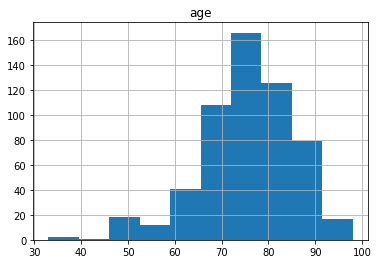

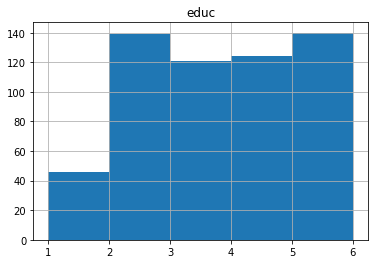

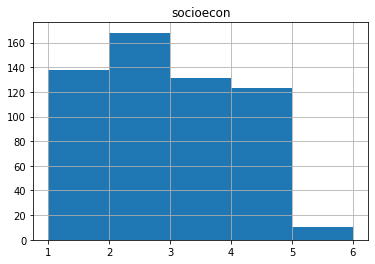

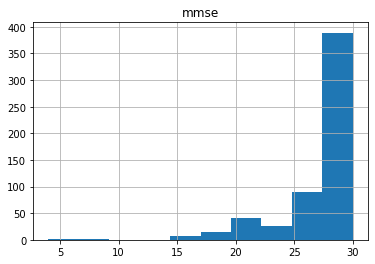

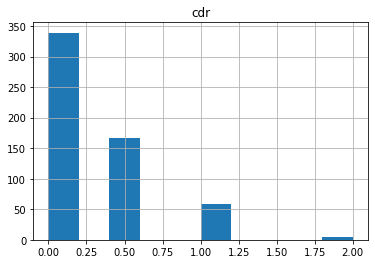

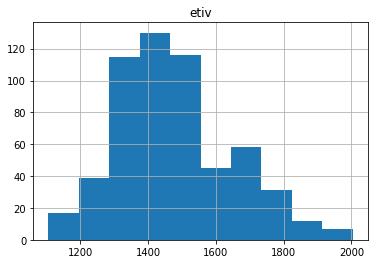

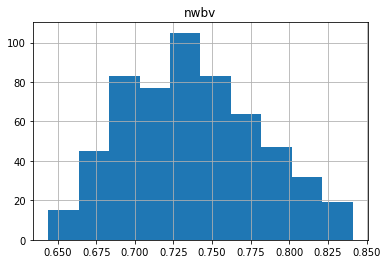

In [21]:
data.hist('age')
data.hist('educ', bins = np.arange(1, 7))
data.hist('socioecon', bins = np.arange(1, 7))
data.hist('mmse')
data.hist('cdr')
data.hist('etiv')
data.hist('nwbv')

We observed that age, Estimated Total Intracranial Volume, and Normalize Whole Brain Volume are normally distributed, while other variables are not normally distributed. Socio-economic status is close to normal distributed. Mini Mental State Examination is left-skewed, and Clinical Dementia Rating is right skewed.

There are no obvious outliers from the histograms.

We generate a scatter plot matrix to explore the relationships between different variables.

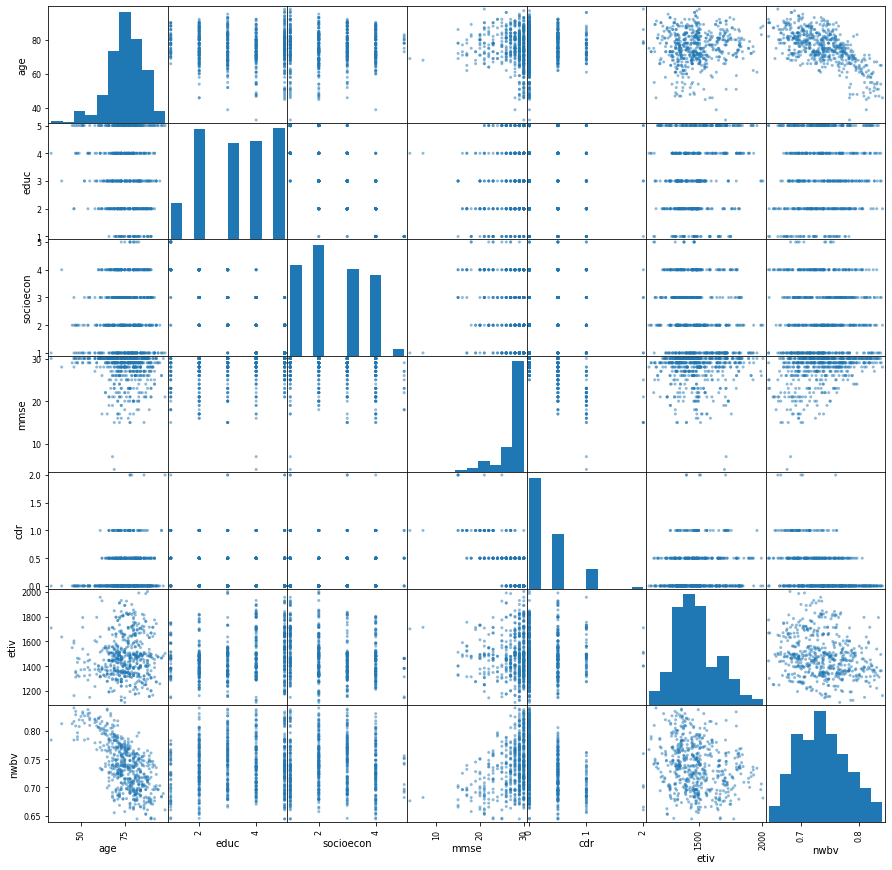

In [22]:
fig = pd.plotting.scatter_matrix(data[['age', 'educ', 'socioecon', 'mmse', 'cdr', 'etiv', 'nwbv']], figsize = (15,15))

We can observe that there are some correlations between the variables, such as the correlation between age and Normalize Whole Brain Volume, the correlation between Mini Mental State Examination and Clinical Dementia Rating, and the correlation between Clinical Dementia Rating and Normalize Whole Brain Volume. We will look into some of these correlations in the figures below.

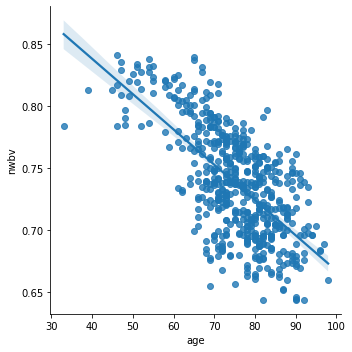

In [208]:
sns.lmplot(x = 'age', y = 'nwbv', data = data)

The correlation between age and nwbv，nwbv is negatively correlated to age.

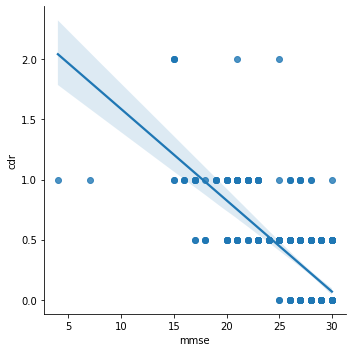

In [209]:
sns.lmplot(x = 'mmse', y = 'cdr', data = data)

The correlation between mmse and cdr, cdr is negatively correlated to mmse.

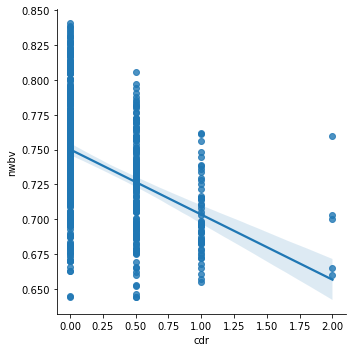

In [210]:
sns.lmplot(x = 'cdr', y = 'nwbv', data = data)

The correlation between nwbv and cdr. nwbv is negatively correlated to cdr.

From these correlations we can generate insights for the analysis, for example, the correlation between cdr(Clinical Dementia Rating) and nwbv(Normalize Whole Brain Volume) may suggest that brain development is indeed correlated to dementia, and it is worth it to put these variables in the analysis.

### Now we move on to the analysis.

We are predicting dementia based on cdr, which is a classification task. We will use a classification model such as a decision tree classifier. We choose the decision tree classifier for the following reasons: 1.it is easy to understand the logic, for example, if age exceeds certain number then it is more likely to have more serious dementia. 2.it fits well to multi-class classification.

Our dependent variable is cdr, and our independent variables are age, educ, socioecon, mmse, etiv, and nwbv. Among the independent variables, age, educ, and socioecon measure the age, education level, and socioeconomic status of the subject, and mmse, etiv, and nwbv measure the brain development of the subject.

In [23]:
X = data[['age', 'educ', 'socioecon', 'mmse', 'etiv', 'nwbv']]
y = data['cdr']

In [24]:
# Transform cdr into its dementia suggestions
y = y.replace({0.0: 'non-demented', 0.5: 'very mild dementia', 1: 'mild dementia', 2.0: 'moderate dementia'})

We do a train test split with 20 percent of the data to be the test set

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 10)

In [196]:
mod = DecisionTreeClassifier()

In [197]:
mod.fit(X_train, y_train)

DecisionTreeClassifier()

In [198]:
train_pred = mod.predict(X_train)

In [199]:
sklearn.metrics.confusion_matrix(y_train, train_pred)

array([[ 50,   0,   0,   0],
       [  0,   3,   0,   0],
       [  0,   0, 272,   0],
       [  0,   0,   0, 131]], dtype=int64)

In [200]:
# typically decision tree classifiers have perfect performance on the training set due to its nature
classification_report_train = classification_report(y_train, train_pred)
print(classification_report_train)

                    precision    recall  f1-score   support

     mild dementia       1.00      1.00      1.00        50
 moderate dementia       1.00      1.00      1.00         3
      non-demented       1.00      1.00      1.00       272
very mild dementia       1.00      1.00      1.00       131

          accuracy                           1.00       456
         macro avg       1.00      1.00      1.00       456
      weighted avg       1.00      1.00      1.00       456



In [201]:
test_pred = mod.predict(X_test)

In [202]:
confusion_matrix(y_test, test_pred)

array([[ 6,  0,  0,  3],
       [ 0,  1,  0,  1],
       [ 3,  0, 55,  9],
       [ 1,  0,  4, 31]], dtype=int64)

In [203]:
classification_report_test = classification_report(y_test, test_pred)
print(classification_report_test)

                    precision    recall  f1-score   support

     mild dementia       0.60      0.67      0.63         9
 moderate dementia       1.00      0.50      0.67         2
      non-demented       0.93      0.82      0.87        67
very mild dementia       0.70      0.86      0.78        36

          accuracy                           0.82       114
         macro avg       0.81      0.71      0.74       114
      weighted avg       0.84      0.82      0.82       114



As we can see, we achieved an accuracy of 0.82, which is quite satisfactory. The f1-scores of all categories are above 0.5, which is also good. We showed that we can predict dementia based on socioeconomic status, educational level, age, and brain development.

# Ethics & Privacy

*All of  our datasets will come from public datasets. The subjects are right-handed women and men, and their ages vary from 18 to 96 to form a better representation. All subjects, including patients diagnosed with Alzheimers, remain anonymous so that their privacy would not be intruded. Exclusion criteria included those with biological or medical conditions that were unfit for MRI tests. Agreement was obtained from all subjects to take regular cognitive tests and submit an initial blood sample.*

*The dataset comes from the project “Open Access Series of Imaging Studies”, which aims at making MRI data sets of the brain freely available to the scientific community. The author affirms that all relevant ethical guidelines have been followed and any necessary ethical approvals have been obtained.*

# Conclusion & Discussion

**Conclusion**

Our data has 570 observations of subjects on factors correlated to dementia. Our data is merged from two datasets from the same source. We aimed to discover the relationship between social and biological factors and the clinical dementia rating of subjects. According to the data analysis, we discovered that there is a correlation between age and brain development. By using a decision tree classifier to perform training on this dataset, we can predict dementia (cdr) by subject's biological factors (MMSE, etiv, and nwbv) and their social factors (age, educ, and socioecon measure the age, education level, and socioeconomic status). Thus, the results support our hypothesis that the independent factors are correlated to the development of dementia and they can be used together to predict dementia.

**Limitations**

One of the biggest limitations of the study is the insufficient amount of observations we have in our dataset. An ideal dataset should have at least 1000 observations. The accuracy of the decision tree classifier would increase if the observations are doubled.

Another major limitation of the study comes from the data itself. Since most of the measurements on the subjects are categorical, it is hard to measure the correlation between variables by linear regression. Thus, we are not able to determine which of the independent variables play a major role in predicting dementia. For example, the cdr rating ranges from 0.0 to 2.0, and the educational level ranges from 1 to 5. It is not possible to test the correlation by linear regression. Although other methods can be applied to these types of data, it would be time-consuming to normalize them. Thus, we directly perform a classification task on the dataset to examine its ability to predict dementia.

Since we merged two datasets--longitudinal and cross-sectional--we have more observations of subjects from age 60 to 96 years old coming from the longitudinal dataset. Whereas the cross-sectional dataset consists of subjects from age 18 to 96 years old. Thus, it may be hard to generalize the findings to young and middle-aged people. However, we should also consider the fact that dementia or Alzheimer's are more common in older people. Thus, the impact of the merging datasets requires further discussion.

**Discussion**

The internal validity of the study is high. The dataset is provided by OASIS and the variables are measured by professionals. Thus, the data is reliable. Also, the performance of the classification task is high, which means that we can make reliable predictions on dementia.

The generalizability of the finding is low. Since the data is provided by OASIS--an organization from the eastern US, the finding cannot be generalized to other countries. Thus, the participants are likely selected from the population of the east coast of the states. There are confounding variables in other societies that may interfere with the accuracy of the prediction. Also, the method used for diagnosing dementia may differ from country to country. Therefore, it may be hard to generalize the finding to a broader population.

Although the generalizability of the finding is low, this project shows that dementia may be predicted by using data provided by OASIS. If the dataset has sufficient observations that cover a broad range of populations, the algorithm trained using such a dataset can provide more accurate and highly generalizable results. By doing so, we may predict dementia/Alzheimer's sooner in society and those patients may begin their treatment early to avoid deteriorating.

# Team Contributions

Ziyi Wang: Proposal, Hypothesis, Background&Resources, Dataset, Overview, Team cooperation

Huilin Xu: Hypothesis, Conclusion&Discussion, Data setup, cleaning, and EDA

Shucun Si: Proposal, Background&Resources, Dataset, Data setup, cleaning, EDA, and analysis

Eva Zhuang: Proposal, Ethics, Video Summary Speech

Wanying Xu: Background, Data, Preparation, Video Summary Speech